<a href="https://colab.research.google.com/github/Musabkhan1/Titanic_survival/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from datetime import *
from matplotlib import pyplot
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = '/content/drive/My Drive/Titanic/train.csv'

file_path1 = '/content/drive/My Drive/Titanic/test.csv'

In [0]:
titanic_test= pd.read_csv(file_path1)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
titanic_test1 = titanic_test['PassengerId']


In [0]:
titanic_df = pd.read_csv(file_path)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
#Q1: Ratio of Male and Female on Ship ?

titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


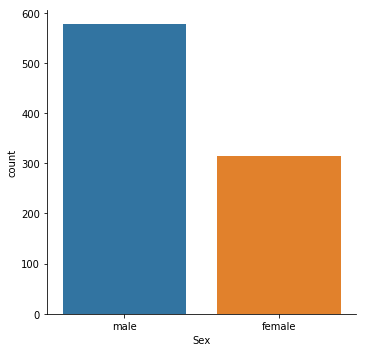

In [0]:
# Graph shows that number of male passengers are more than female passengers.

sns.factorplot('Sex',data=titanic_df,kind="count")

In [0]:
# Distribution of males and females based on pclass and place of embarkment(port form passengers onboarded ship)

titanic_df.groupby(['Pclass','Sex','Embarked']).size()

Pclass  Sex     Embarked
1       female  C            43
                Q             1
                S            48
        male    C            42
                Q             1
                S            79
2       female  C             7
                Q             2
                S            67
        male    C            10
                Q             1
                S            97
3       female  C            23
                Q            33
                S            88
        male    C            43
                Q            39
                S           265
dtype: int64

In [0]:
pd.crosstab(index=[titanic_df['Pclass']], columns=[titanic_df['Sex']])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


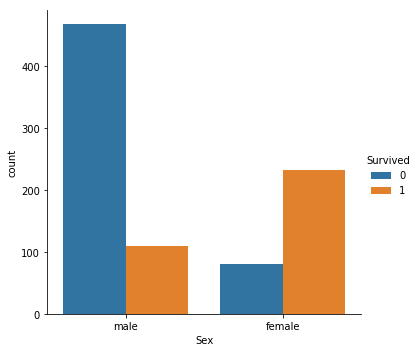

In [0]:
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Survived')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


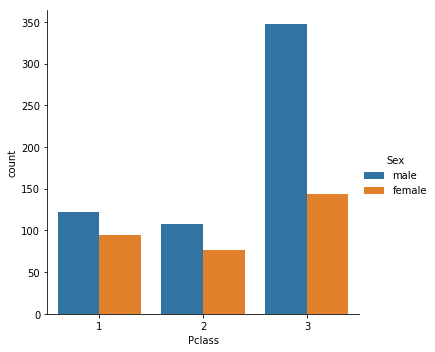

In [0]:
# Count of Pclass based on Gender
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


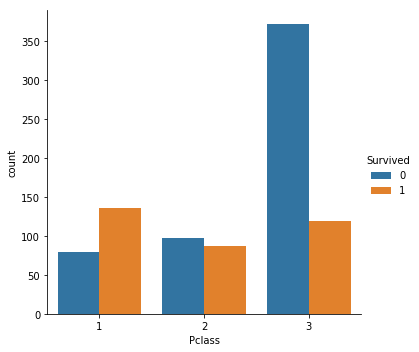

In [0]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Survived')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


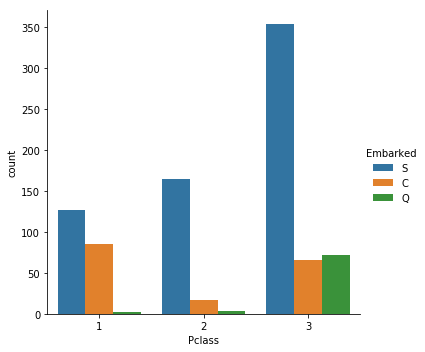

In [0]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Embarked')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


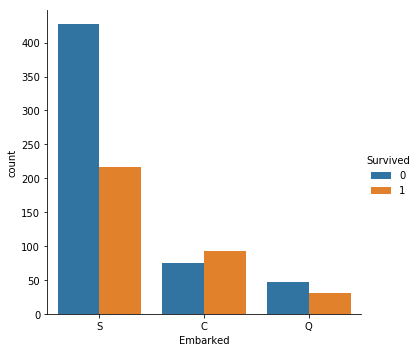

In [0]:
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Survived')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


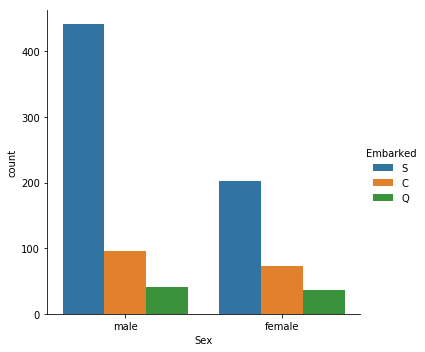

In [0]:
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Embarked')

In [0]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [0]:
titanic_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

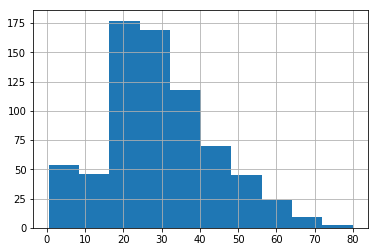

In [0]:

# Ages of people 

# Mean is around 30

titanic_df['Age'].hist(bins = 10)


In [0]:
titanic_df['Age'].mean()

29.69911764705882

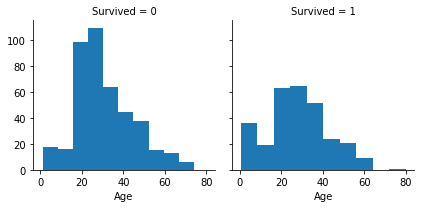

In [0]:
g = sns.FacetGrid(titanic_df, col='Survived')
g.map(plt.hist, 'Age', bins=10)

In [0]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [0]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis = 1)

In [0]:
titanic_test['Person'] = titanic_test[['Age','Sex']].apply(male_female_child,axis = 1)

In [0]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [0]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


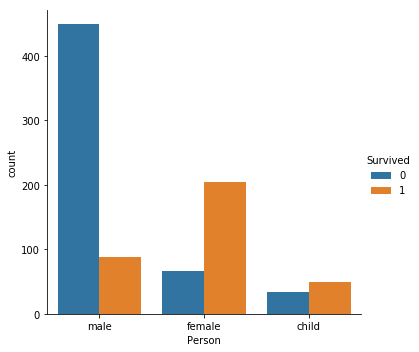

In [0]:
sns.factorplot('Person',data=titanic_df,kind='count',hue='Survived')

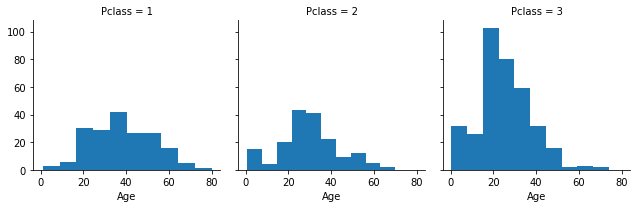

In [0]:
g = sns.FacetGrid(titanic_df, col='Pclass')
g.map(plt.hist, 'Age', bins=10)

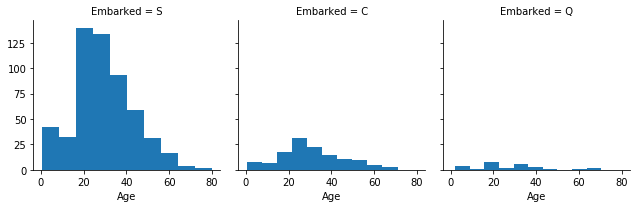

In [0]:
g = sns.FacetGrid(titanic_df, col='Embarked')
g.map(plt.hist, 'Age', bins=10)

In [0]:
# Percentage of Null Values in cabin column =
p_null_cabin= (len(titanic_df['Cabin']) - titanic_df['Cabin'].count())*100.0/len(titanic_df['Cabin'])
p_null_cabin

77.10437710437711

In [0]:
titanic_df = titanic_df.drop(['Ticket', 'Cabin'], axis=1)


In [0]:
titanic_test1= titanic_test['PassengerId']
titanic_test= titanic_test.drop(['Ticket', 'Cabin','PassengerId'], axis=1)

In [0]:
titanic_df['Title'] = titanic_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
titanic_df['Title'] = titanic_df['Title'].fillna(0)

In [0]:
titanic_test['Title'] = titanic_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_test['Title'] = titanic_test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_test['Title'] = titanic_test['Title'].replace('Mlle', 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Ms', 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Mme', 'Mrs')
                 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic_test['Title'] = titanic_test['Title'].map(title_mapping)
titanic_test['Title'] = titanic_test['Title'].fillna(0)                 

In [0]:
titanic_test= titanic_test.drop(['Name'], axis=1)

In [0]:
titanic_df = titanic_df.drop(['Name', 'PassengerId'], axis=1)


In [0]:
titanic_df['Person'] = titanic_df['Person'].map( {'female': 1, 'male': 0, 'child': 2} ).astype(int)

In [0]:
titanic_test['Person'] = titanic_test['Person'].map( {'female': 1, 'male': 0, 'child': 2} ).astype(int)

In [0]:
titanic_df['Sex'] = titanic_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [0]:
titanic_test['Sex'] = titanic_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [0]:
titanic_df['Age'] = titanic_df['Age'].fillna((titanic_df['Age'].mean()))


In [0]:

titanic_df['Age'] = titanic_df['Age'].astype(int)
titanic_df.loc[ titanic_df['Age'] <= 11, 'Age'] = 0
titanic_df.loc[(titanic_df['Age'] > 11) & (titanic_df['Age'] <= 18), 'Age'] = 1
titanic_df.loc[(titanic_df['Age'] > 18) & (titanic_df['Age'] <= 22), 'Age'] = 2
titanic_df.loc[(titanic_df['Age'] > 22) & (titanic_df['Age'] <= 27), 'Age'] = 3
titanic_df.loc[(titanic_df['Age'] > 27) & (titanic_df['Age'] <= 33), 'Age'] = 4
titanic_df.loc[(titanic_df['Age'] > 33) & (titanic_df['Age'] <= 40), 'Age'] = 5
titanic_df.loc[(titanic_df['Age'] > 40) & (titanic_df['Age'] <= 66), 'Age'] = 6
titanic_df.loc[ titanic_df['Age'] > 66, 'Age'] = 6

In [0]:
titanic_test['Age'] = titanic_test['Age'].fillna((titanic_test['Age'].mean()))

In [0]:
titanic_test['Age'] = titanic_df['Age'].astype(int)
titanic_test.loc[ titanic_test['Age'] <= 11, 'Age'] = 0
titanic_test.loc[(titanic_test['Age'] > 11) & (titanic_test['Age'] <= 18), 'Age'] = 1
titanic_test.loc[(titanic_test['Age'] > 18) & (titanic_test['Age'] <= 22), 'Age'] = 2
titanic_test.loc[(titanic_test['Age'] > 22) & (titanic_test['Age'] <= 27), 'Age'] = 3
titanic_test.loc[(titanic_test['Age'] > 27) & (titanic_test['Age'] <= 33), 'Age'] = 4
titanic_test.loc[(titanic_test['Age'] > 33) & (titanic_test['Age'] <= 40), 'Age'] = 5
titanic_test.loc[(titanic_test['Age'] > 40) & (titanic_test['Age'] <= 66), 'Age'] = 6
titanic_test.loc[ titanic_test['Age'] > 66, 'Age'] = 6

In [0]:
titanic_df['Age'].head(5)

0    2
1    5
2    3
3    5
4    5
Name: Age, dtype: int64

In [0]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [0]:
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1

In [0]:
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

In [0]:
titanic_test['IsAlone'] = 0
titanic_test.loc[titanic_test['FamilySize'] == 1, 'IsAlone'] = 1

In [0]:
freq_port =titanic_df.Embarked.dropna().mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(freq_port)
titanic_df['Embarked'] = titanic_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [0]:
freq_port =titanic_test.Embarked.dropna().mode()[0]
titanic_test['Embarked'] = titanic_test['Embarked'].fillna(freq_port)
titanic_test['Embarked'] = titanic_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [0]:
titanic_test['Fare'].fillna(titanic_test['Fare'].dropna().median(), inplace=True)

In [0]:
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
titanic_df.loc[ titanic_df['Fare'] <= 7, 'Fare'] = 0
titanic_df.loc[(titanic_df['Fare'] > 7) & (titanic_df['Fare'] <=14), 'Fare'] = 1
titanic_df.loc[(titanic_df['Fare'] > 14) & (titanic_df['Fare'] <= 31), 'Fare'] = 2
titanic_df.loc[(titanic_df['Fare'] > 31) , 'Fare'] = 3

In [0]:
titanic_test['Fare'] = titanic_test['Fare'].astype(int)
titanic_test.loc[titanic_test['Fare'] <= 7, 'Fare'] = 0
titanic_test.loc[(titanic_df['Fare'] > 7) & (titanic_test['Fare'] <=14), 'Fare'] = 1
titanic_test.loc[(titanic_test['Fare'] > 14) & (titanic_test['Fare'] <= 31), 'Fare'] = 2
titanic_test.loc[(titanic_test['Fare'] > 31) , 'Fare'] = 3

In [0]:
titanic_df['Age*Famly'] = titanic_df['Age'] * titanic_df['FamilySize']
        
titanic_df['Sex*Pclass'] = titanic_df['Sex'] * titanic_df['Pclass']

titanic_df['Sex*Embarked'] = titanic_df['Sex'] * titanic_df['Embarked']

In [0]:
titanic_test['Age*Famly'] = titanic_test['Age'] * titanic_test['FamilySize']
        
titanic_test['Sex*Pclass'] = titanic_test['Sex'] * titanic_test['Pclass']

titanic_test['Sex*Embarked'] = titanic_test['Sex'] * titanic_test['Embarked']

In [0]:
print(titanic_df.shape,titanic_test.shape)

(891, 15) (418, 14)


In [0]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,Title,FamilySize,IsAlone,Age*Famly,Sex*Pclass,Sex*Embarked
0,0,3,0,2,1,0,0,0,0,1,2,0,4,0,0
1,1,1,1,5,1,0,3,1,1,3,2,0,10,1,1
2,1,3,1,3,0,0,0,0,1,2,1,1,3,3,0
3,1,1,1,5,1,0,3,0,1,3,2,0,10,1,0
4,0,3,0,5,0,0,1,0,0,1,1,1,5,0,0


In [0]:
Y_train = titanic_df['Survived']

X_train = titanic_df.iloc[:,1:]

In [0]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Person',
       'Title', 'FamilySize', 'IsAlone', 'Age*Famly', 'Sex*Pclass',
       'Sex*Embarked'],
      dtype='object')

In [0]:
X_test = titanic_test
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Person',
       'Title', 'FamilySize', 'IsAlone', 'Age*Famly', 'Sex*Pclass',
       'Sex*Embarked'],
      dtype='object')

In [0]:
print(X_train.shape,titanic_test.shape)

(891, 14) (418, 14)


In [0]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, Y_train) * 100, 2)
acc_log


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


83.39

In [0]:

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(titanic_test.iloc[:,:])
df1 = pd.DataFrame(np.array([titanic_test.iloc[:,0],Y_pred]).T,columns=['PassengerId','Survived'])
df1

 
acc_decision_tree = round(clf.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.05

In [0]:
import matplotlib.pyplot as plt
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot


In [0]:
df1.to_csv('prediction.csv',index=False)

In [0]:
def plot_decision_tree(clf,feature_name,target_name):
    from IPython.display import Image 
    try:
      from StringIO import StringIO
    except ImportError:
      from io import StringIO
    import pydotplus
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

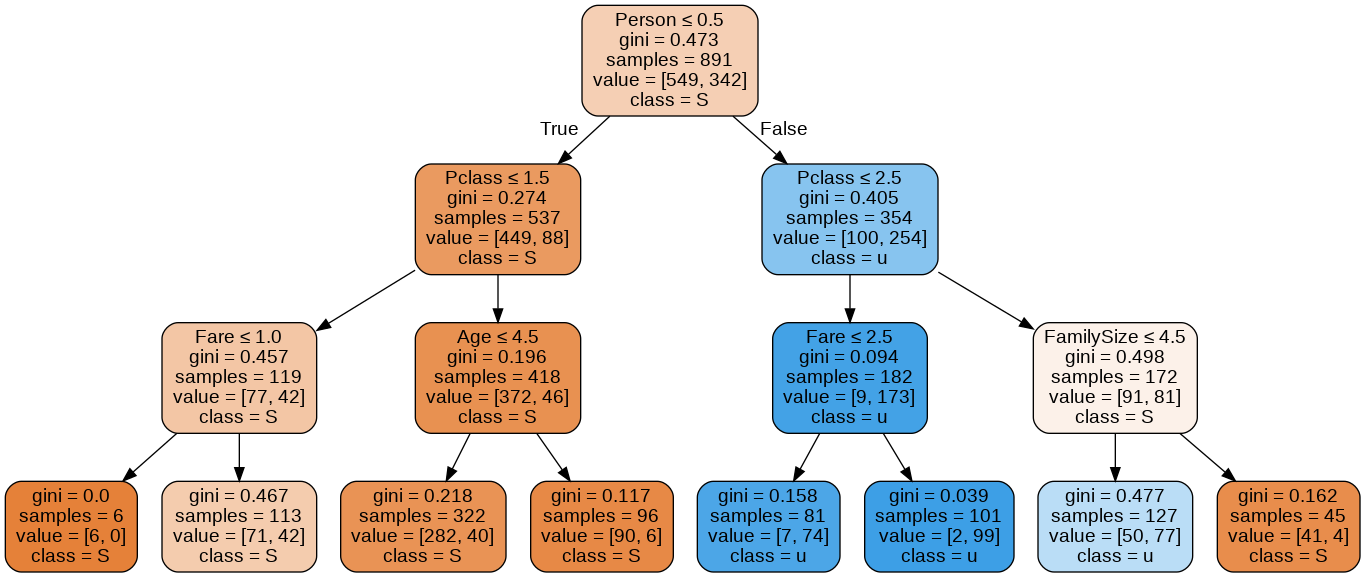

In [0]:
plot_decision_tree(clf,X_train.columns,df1.columns[1])

In [0]:
coeff_df = pd.DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.886666
7,Person,1.254767
13,Sex*Embarked,0.513637
8,Title,0.258792
5,Fare,0.228944
6,Embarked,0.051829
11,Age*Famly,0.050663
2,Age,-0.174391
4,Parch,-0.259993
9,FamilySize,-0.306903


In [0]:
rfc=RandomForestClassifier(random_state=42)



In [0]:
param_grid = {
    'n_estimators': [2,4,6,8,16,32],
    'max_features': ['log2', 'sqrt','auto'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1,5,8]
}

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state=42)

In [0]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [0]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 16}

In [0]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 32, min_samples_split= 2,min_samples_leaf= 5,max_depth=10, criterion='gini')

In [0]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
pred=rfc1.predict(x_test)

In [0]:
pred.shape

(268,)

In [1]:
print("Accuracy for Random Forest ",accuracy_score(y_test,pred))

NameError: ignored

In [0]:
op_rf=rfc1.predict(X_test)

In [0]:
op=pd.DataFrame(titanic_test1)
op['Survived']=op_rf

In [0]:
op['Survived'].value_counts()

0    264
1    154
Name: Survived, dtype: int64

In [0]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.138
Sex*Pclass,0.129
Person,0.102
Pclass,0.097
Fare,0.088
Age*Famly,0.086
Sex,0.074
Age,0.073
FamilySize,0.059


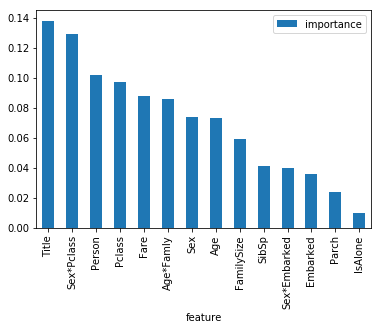

In [0]:
importances.plot.bar()